In [1]:
!pip install pandas matplotlib seaborn openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("tabasco_wind.csv")
df.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,WS50M,1981,6.05,7.57,6.14,5.99,4.46,5.75,6.49,5.92,5.15,5.87,6.15,6.14,5.96
1,WS50M,1982,6.70,5.70,5.85,4.77,4.64,5.02,7.06,6.40,5.04,5.81,6.16,6.23,5.79
2,WS50M,1983,6.53,5.71,6.27,6.05,4.49,4.26,7.35,6.11,5.58,6.32,5.64,6.56,5.91
3,WS50M,1984,6.63,6.20,5.95,5.96,5.88,6.16,6.30,6.30,5.58,6.01,6.45,7.15,6.22
4,WS50M,1985,6.33,6.52,6.35,5.65,4.68,4.93,6.09,5.82,4.92,6.21,6.48,6.87,5.90


In [4]:
df.columns

Index(['PARAMETER', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANN'],
      dtype='object')

In [5]:
df_long = df.melt(id_vars=["YEAR"], 
                  value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                              'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
                  var_name="MONTH", 
                  value_name="WS50M")
df_long.head()

,YEAR,MONTH,WS50M
0,1981,JAN,6.05
1,1982,JAN,6.70
2,1983,JAN,6.53
3,1984,JAN,6.63
4,1985,JAN,6.33


In [6]:
month_map = {
    "JAN":1, "FEB":2, "MAR":3, "APR":4, "MAY":5, "JUN":6,
    "JUL":7, "AUG":8, "SEP":9, "OCT":10, "NOV":11, "DEC":12
}
df_long["MONTH_NUM"] = df_long["MONTH"].map(month_map)

df_long["DATE"] = pd.to_datetime(dict(year=df_long.YEAR, month=df_long.MONTH_NUM, day=1))
df_long = df_long.sort_values("DATE")

df_long.set_index("DATE", inplace=True)

df_long.head()


,YEAR,MONTH,WS50M,MONTH_NUM
DATE,,,,
1981-01-01,1981,JAN,6.05,1
1981-02-01,1981,FEB,7.57,2
1981-03-01,1981,MAR,6.14,3
1981-04-01,1981,APR,5.99,4
1981-05-01,1981,MAY,4.46,5


In [7]:
print(df_long["WS50M"].describe())

count    528.000000
mean       6.145814
std        0.735933
min        4.260000
25%        5.640000
50%        6.140000
75%        6.672500
max        8.140000
Name: WS50M, dtype: float64


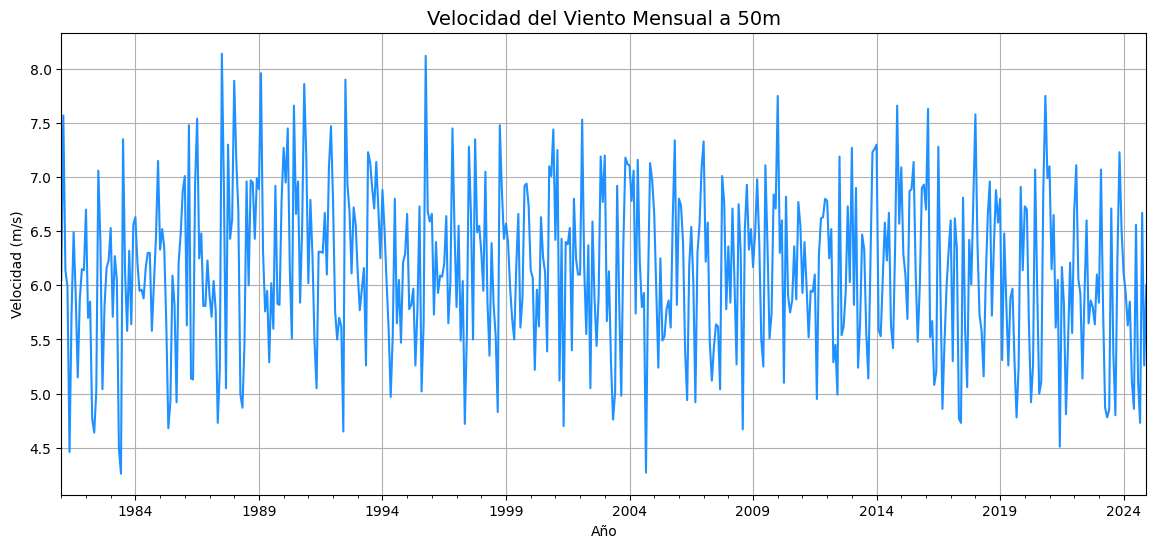

In [8]:
plt.figure(figsize=(14,6))
df_long["WS50M"].plot(color = "dodgerblue")
plt.title("Velocidad del Viento Mensual a 50m", fontsize=14)
plt.ylabel("Velocidad (m/s)")
plt.xlabel("Año")
plt.grid(True)
plt.show()

**Fig. 1 Velocidad Mensual del Viento a 50 m**
- El rango de velocidades mensuales oscila entre 4.3 m/s y más de 8.0 m/s, lo cual indica una **alta variabilidad a lo largo de los años**.
  
- Se identifican **picos frecuentes en los meses intermedios de cada año**, reflejando estacionalidad marcada.

  
- En general, **se mantiene un promedio alrededor de los 6.0 m/s**, lo cual supera el umbral mínimo para aplicaciones de energía eólica de baja escala.

  
- No se observa una tendencia clara de aumento o disminución sostenida, aunque hay una leve disminución en los últimos años que podría analizarse más a fondo.

  
- Este comportamiento sugiere que **el sitio tiene un potencial eólico aprovechable**, especialmente en ciertos meses del año.


In [23]:
promedio_anual = df_long.groupby("YEAR")["WS50M"].mean().reset_index()
promedio_anual.columns = ["AÑO", "VELOCIDAD_MEDIA"]

C:\Users\user\AppData\Local\Temp\ipykernel_11112\2912359237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_anual, x="AÑO", y="VELOCIDAD_MEDIA", palette="Blues_d")


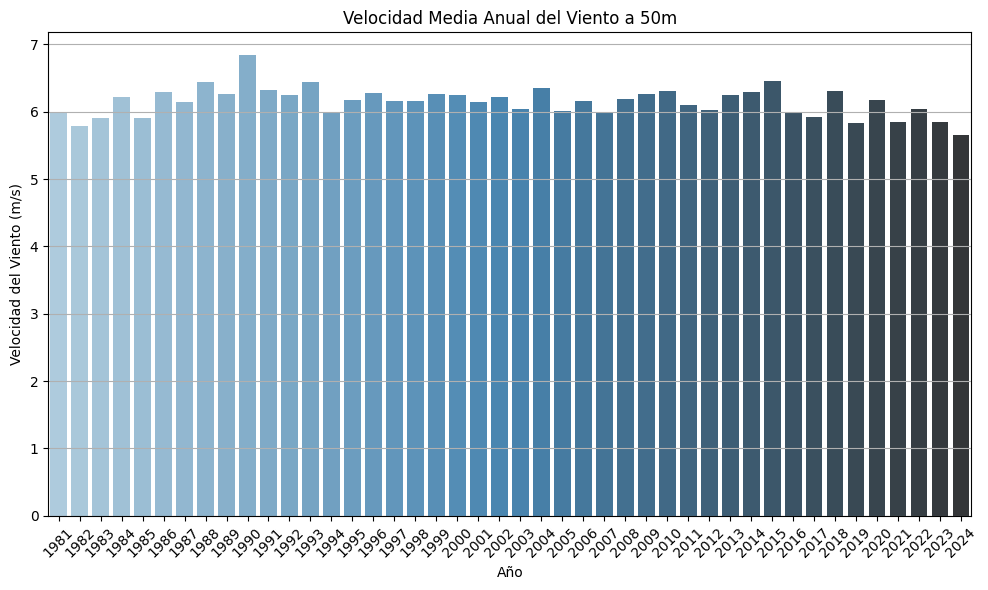

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=promedio_anual, x="AÑO", y="VELOCIDAD_MEDIA", palette="Blues_d")
plt.title("Velocidad Media Anual del Viento a 50m")
plt.xlabel("Año")
plt.ylabel("Velocidad del Viento (m/s)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

**Fig. 2 Velocidad Media Anual del Viento a 50 m**
- La velocidad media anual varía entre 5.6 m/s y 6.8 m/s aproximadamente, lo cual indica **condiciones relativamente estables en el largo plazo.**
  
- El período comprendido entre 1985 y 1995 muestra los valores más altos, con picos que superan los 6.8 m/s.

  
- **A partir de 2016, se observa una tendencia a la baja en la velocidad media del viento**, bajando incluso por debajo de 6.0 m/s en años recientes.

  
- Esta reducción sostenida **podría afectar el rendimiento esperado de proyectos eólicos** si no se toman medidas de compensación o selección óptima de turbinas.

  
- A pesar de la caída reciente, **los valores siguen estando por encima del umbral mínimo operativo** para aerogeneradores de mediana escala (~5.0 m/s).

In [14]:
df_long["WS50M"] = df_long["WS50M"].astype(float)

In [15]:
rho = 1.225 #kg/m3

In [16]:
df_long["POTENCIA_VIENTO"] = 0.5 * rho * (df_long["WS50M"] ** 3)

In [17]:
promedio_anual = df_long.groupby("YEAR")["POTENCIA_VIENTO"].mean().reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_11112\3811804283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_anual, x="YEAR", y="POTENCIA_VIENTO", palette="Blues_d")


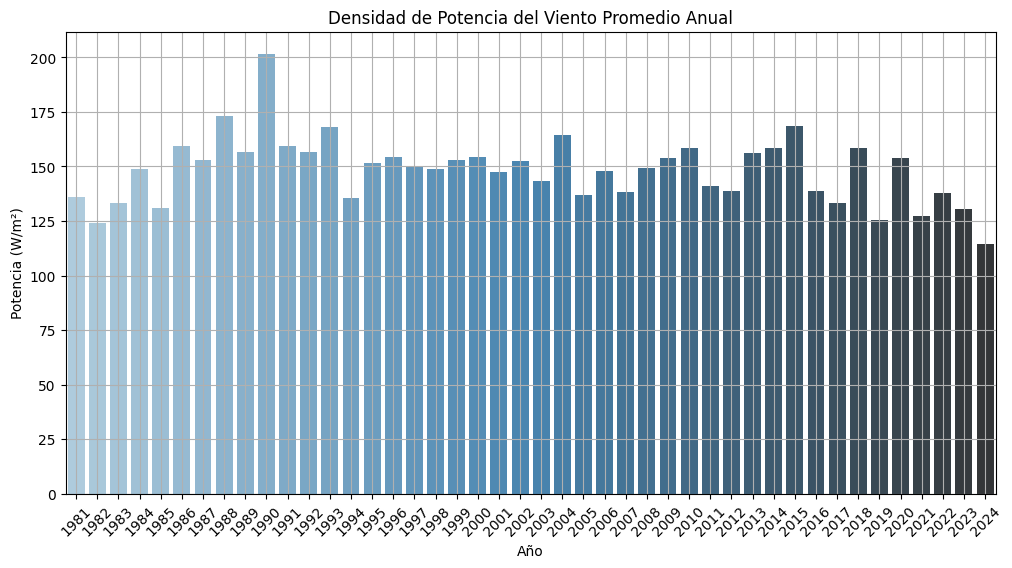

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=promedio_anual, x="YEAR", y="POTENCIA_VIENTO", palette="Blues_d")
plt.title("Densidad de Potencia del Viento Promedio Anual")
plt.xlabel("Año")
plt.ylabel("Potencia (W/m²)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Fig. 3 Densidad de Potencia del Viento**
- **El rango de densidad de potencia anual va de aproximadamente 115 W/m² a más de 200 W/m²**, lo cual está dentro de los niveles moderados a buenos para proyectos eólicos terrestres.

- **El año 1990 presenta el mayor valor (~203 W/m²)**, indicando un potencial excepcional en ese periodo.

- **Desde 2015, hay una tendencia descendente clara**, cayendo por debajo de 140 W/m² en los últimos años.

- A pesar de esta disminución reciente, **muchos años aún superan el umbral de 150 W/m²**, que se considera **adecuado para turbinas de baja a media capacidad**.

- La correlación con la velocidad del viento es evidente: años con mayor velocidad (como 1989-1991) también muestran mayor densidad de potencia.


## 📊 Resumen Ejecutivo del Sitio"
### Ubicación: Sanchez Magallanes- Costa de Tabasco"
Periodo de análisis: 1987 - 2024

✅ **Conclusión preliminar:** El sitio presenta un recurso eólico utilizable, con meses óptimos y un potencial moderado según la densidad de potencia. Ideal para proyectos piloto o turbinas pequeñas a medianas.
